In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing table from previous task

In [3]:
df=pd.read_csv('Datasets/FinalDF.csv')

In [4]:
# here is an overview of the dataframe
df.tail()

,SURVMNTH,LFSSTAT,PROV,AGE_12,SEX,EDUC,NAICS_21,NOC_10,NOC_40,COWMAIN,FTPTMAIN,QUARTER,VOLUNTARY_PT
977012,9,"1-Employed, at work",13,9,2-Female,4,10.0,7.0,25.0,2.0,2.0-Part-time,2022Q3,True
977013,9,4-Not in labour force,24,9,1-Male,5,18.0,3.0,11.0,1.0,0.0-Not applicable,2022Q3,False
977014,9,"1-Employed, at work",59,5,1-Male,6,14.0,2.0,5.0,2.0,1.0-Full-time,2022Q3,False
977015,9,"1-Employed, at work",35,10,2-Female,4,15.0,1.0,2.0,2.0,1.0-Full-time,2022Q3,False
977016,9,"1-Employed, at work",35,6,2-Female,4,17.0,4.0,12.0,1.0,1.0-Full-time,2022Q3,False


# Question 1 - What is the unemployment rate in each quarter of the given year?

In [5]:
# unemployment rate is the size of umemployed divided by size of the labour force

# exploring the LFSSTAT column
df.LFSSTAT.value_counts()

1-Employed, at work             518094
4-Not in labour force           369107
2-Employed, absent from work     56801
3-Unemployed                     33015
Name: LFSSTAT, dtype: int64

In [6]:
# of the four values, labour force = (1-Employed, at work) + (2-Employed, absent from work) + (3-Unemployed)
# unemployed = 3-Unemployed

In [7]:
df[df['LFSSTAT'].isin(['1-Employed, at work','2-Employed, absent from work','3-Unemployed'])]['LFSSTAT'].count()

607910

In [71]:
#Defining a function to return unemployment rate for each group (quarter)


def unemployment(group):
    #formula is as follows: unemployment rate = 
    #multiple by 100 since we are used to see the unemployment rate measured as a percentage
    return round(group[group['LFSSTAT'].isin(['3-Unemployed'])]['LFSSTAT'].count()/group[group['LFSSTAT'].isin(['1-Employed, at work',
                                                                                                                       '2-Employed, absent from work',
                                                                                                                       '3-Unemployed'])]['LFSSTAT'].count()*100,2)


In [74]:
#Defining a function to return a table containing unemployment of each quarter of the given year


def unemployment_rate_tbl(data):
    #grouping by quarter, applying custom function on a group level
    tbl=data.groupby('QUARTER', 
           as_index=False).apply(unemployment)
    #assigning column names
    tbl.columns=['QUARTER',
                 'UNEMPLOYMENT_RATE']
    return tbl

In [75]:
#passing in the dataframe to return the table required for Question 1

unemployment_rate_tbl(df)

,QUARTER,UNEMPLOYMENT_RATE
0,2022Q1,6.06
1,2022Q2,5.07
2,2022Q3,5.22


In [180]:
#creating unemployment graph data

def unemployment_graph(data):
    """Inputting an annual dataframe to calculate quarterly unemployment rate
    return a graph with unemployment rate for each quarter.
    """
    #creating variable that contains the unemployment table from previous function
    table=unemployment_rate_tbl(data)
    #creating a new graph 
    plt.figure()
    
    #plotting a bar graph to represent unemployment rate of each quarter
    #setting the first bar as orange because as it has the highest unemployment rate
    graph=plt.bar(table['QUARTER'],table['UNEMPLOYMENT_RATE'],
       width=0.5,
       color=['orange','lightgreen','lightgreen'],
       alpha=0.5)
    
    #adding labels rate of unemployment on top of each bar to better convey the message
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.02,
                 str(table['UNEMPLOYMENT_RATE'][i])+'%',
                 ha='center',
                 weight='bold')
        i+=1
    
    #setting axis labels
    plt.xlabel('Quarter')
    plt.ylabel('Canadian Unemployment Rate')
    
    #turn off the frame of the graph
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    #turn off y-axis ticks
    plt.yticks([])
    
    #add title
    plt.title('Unemployment Rate for Each Quarter in 2022')
    
    return graph

<IPython.core.display.Javascript object>


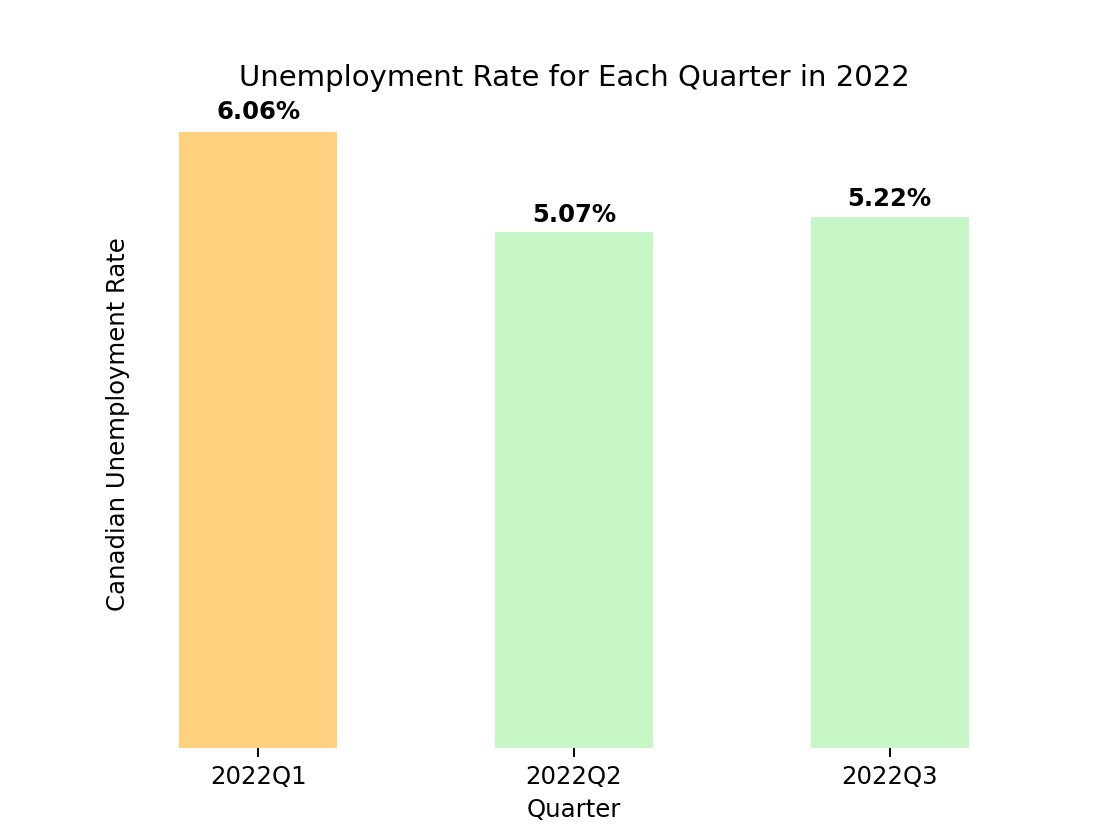

<BarContainer object of 3 artists>

In [291]:
#returning the graph based on the combined annual unemployment dataframe
unemployment_graph(df)

# Question 2 - What is the average tertiary (postsecondary or greater) education attainment rate among the youth (15 - 29) for each province?

In [105]:
#make a copy the dataframe from Question 1
df2=df.copy()

In [107]:
#For this question we need references from educ, prov, and age_12

#importing the reference tables created from task 1
educ=pd.read_csv('Datasets/ref_educ.csv')
prov=pd.read_csv('Datasets/ref_prov.csv')
age_12=pd.read_csv('Datasets/ref_age_12.csv')

In [108]:
# tertiary rate, as indicated in the question, repesents Postsecondary and above, which means any code >=4
educ

,code,en_label,fr_label
0,0,0 to 8 years,0 à 8 années
1,1,Some high school,Études secondaires partielles
2,2,High school graduate,Études secondaires complétées
3,3,Some postsecondary,Études postsecondaires partielles
4,4,Postsecondary certificate or diploma,Diplôme ou certificat d'études postsecondaires
5,5,Bachelor's degree,Baccalauréat
6,6,Above bachelor's degree,Diplôme ou certificat universitaire supérieur ...


In [109]:
# youth, as indicated in the question, repesents ages 15-29, which means any code between 1 and 3 inclusive
age_12

,code,en_label,fr_label
0,1,15 to 19 years,15 à 19 ans
1,2,20 to 24 years,20 à 24 ans
2,3,25 to 29 years,25 à 29 ans
3,4,30 to 34 years,30 à 34 ans
4,5,35 to 39 years,35 à 39 ans
5,6,40 to 44 years,40 à 44 ans
6,7,45 to 49 years,45 à 49 ans
7,8,50 to 54 years,50 à 54 ans
8,9,55 to 59 years,55 à 59 ans
9,10,60 to 64 years,60 à 64 ans


In [110]:
#creating a list of codes to represents the variables
tertiary=[4,5,6]
youth=[1,2,3]

In [111]:
age_12[age_12['code'].isin(youth)]

,code,en_label,fr_label
0,1,15 to 19 years,15 à 19 ans
1,2,20 to 24 years,20 à 24 ans
2,3,25 to 29 years,25 à 29 ans


In [112]:
#looking at province table
prov

,code,en_label,fr_label
0,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador
1,11,Prince Edward Island,Île-du-Prince-Édouard
2,12,Nova Scotia,Nouvelle-Écosse
3,13,New Brunswick,Nouveau-Brunswick
4,24,Quebec,Québec
5,35,Ontario,Ontario
6,46,Manitoba,Manitoba
7,47,Saskatchewan,Saskatchewan
8,48,Alberta,Alberta
9,59,British Columbia,Colombie-Britannique


In [113]:
#for province, we could substitute code value with abbreviations, this is both visually better on graphs and it is 
#representative in both English and French

#creating a dictionary of provincial abbreviations, the mapping between en_label and
#abbreviation codes is found on StatsCan website

province={10:'NL',
         11:'PE',
         12:'NS',
         13:'NB',
         24:'QC',
         35:'ON',
         46:'MB',
         47:'SK',
         48:'AB',
         59:'BC'}

In [117]:
#mapping province codes to the dataframe

df2['PROV']=df2['PROV'].map(province)

In [131]:
#Defining a function that returns tertiary rate for youth in each group

def higher_edu(group):
    return round(group[group['AGE_12'].isin(youth) & group['EDUC'].isin(tertiary)]['EDUC'].count()/
                 group[group['AGE_12'].isin(youth)]['EDUC'].count()*100,2)

In [175]:
# performing a small unit test on overall tertiary rate to sanity-check the grouping results, it checks out

In [135]:
df2[df2['AGE_12'].isin(youth)]['EDUC'].count()

182812

In [133]:
df2[df2['EDUC'].isin(tertiary)]['EDUC'].count()

582649

In [134]:
df2[df2['AGE_12'].isin(youth) & df2['EDUC'].isin(tertiary)]['EDUC'].count()

69772

In [138]:
# Defining a function that returns tertiary rate of a given dataframe by provinces

def tertiary_rate_tbl(data):
    """Input: dataframe to be grouped by provinces, 
        Returns grouped table of Youth Tertiary Rate."""
    tbl=data.groupby('PROV',
                    as_index=False).apply(higher_edu)
    #assigning column names
    tbl.columns=['Provinces','Youth Tertiary Rate']
    return tbl

In [139]:
#passing in the dataframe to return the table required for Question 2

tertiary_rate_tbl(df2)

,Provinces,Youth Tertiary Rate
0,AB,30.67
1,BC,37.35
2,MB,31.67
3,NB,35.49
4,NL,36.56
5,NS,39.28
6,ON,39.51
7,PE,36.89
8,QC,46.34
9,SK,30.21


In [176]:
#creating tertiary rate graph:

def tertiary_graph(data):
    """Inputting an annual dataframe to calculate provincial tertiary rate
    return a graph with tertiary rate for each quarter.
    """
    #creating variable that contains the tertiary table from previous function
    table=tertiary_rate_tbl(data)
    
    #creating a list of values to highlight the top 3 highest Tertiary Rate
    Top3=table['Youth Tertiary Rate'].nlargest(3)
    
    #setting the color of top 3 provinces to red, others to blue
    COL=np.where(table['Youth Tertiary Rate'].isin(Top3),'red','blue')
    
    #creating a new graph 
    plt.figure()
    
    #plotting a horizontal bar graph to represent tertiary rate of each province
    #mapping colors to top 3 values returned in COL
    graph=plt.barh(table['Provinces'],table['Youth Tertiary Rate'],
                   color=COL,
                   alpha=0.5)
    
    #adding labels tertiary rate at the end of each bar to better convey the message
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width,
                 y+height/2,
                 str(table['Youth Tertiary Rate'][i])+'%',
                 ha='left',
                 weight='bold')
        i+=1
    
    #setting axis labels
    plt.xlabel('Tertiary Rate')
    plt.ylabel('Province')
    
    #turn off the frame of the graph
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    #turn off x-axis ticks
    plt.xticks([])
    
    #add title
    plt.title('Tertiary Rate of Youths (15-29) in each Province')
    return graph

<IPython.core.display.Javascript object>


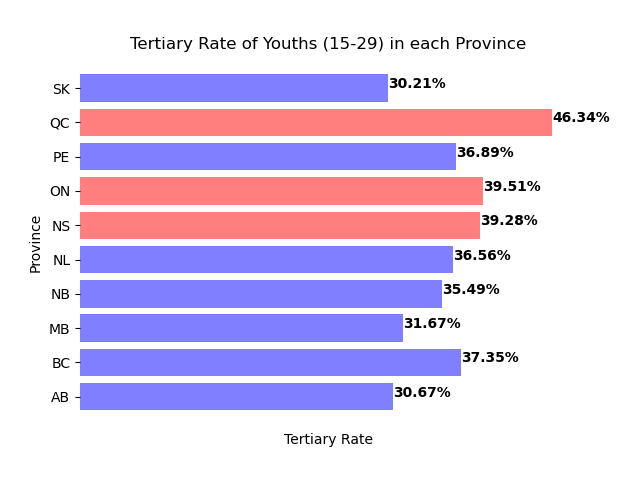

<BarContainer object of 10 artists>

In [177]:
#returning the graph based on the combined annual unemployment dataframe
tertiary_graph(df2)

# Question 3 - What are the top 5 industries that have the highest rate of involuntary part-time work?

In [182]:
# scatter plot with size

# copy a enw dataframe for this question
df3=df.copy()

In [183]:
# use naisc_21 reference table to dervice industries

naisc_21=pd.read_csv('Datasets/ref_naics_21.csv')

In [194]:
# taking a look at the reference file
naisc_21

,code,en_label,fr_label
0,1,Agriculture,Agriculture
1,2,Forestry and logging and support activities fo...,Foresterie et exploitation forestière et activ...
2,3,"Fishing, hunting and trapping","Pêche, chasse et piégeage"
3,4,"Mining, quarrying, and oil and gas extraction","Extraction minière, exploitation en carrière, ..."
4,5,Utilities,Services publics
5,6,Construction,Construction
6,7,Manufacturing - durable goods,Fabrication de biens durables
7,8,Manufacturing - non-durable goods,Fabrication de biens non durables
8,9,Wholesale trade,Commerce de gros
9,10,Retail trade,Commerce de détail


In [230]:
#mapping reference data to the dataframe column using English labels

#French labels can be used by switching 'en_label' to 'fr_label' 
df3['NAICS_21']=df3['NAICS_21'].map(lambda x: naisc_21['en_label'][naisc_21['code']==float(x)].values)

In [247]:
#assigning the str value of NAICS_21
df3['NAICS_21']=df3['NAICS_21'].str[0]

In [250]:
#checking how the top of our dataframe looks like
df3.head()

,SURVMNTH,LFSSTAT,PROV,AGE_12,SEX,EDUC,NAICS_21,NOC_10,NOC_40,COWMAIN,FTPTMAIN,QUARTER,VOLUNTARY_PT
0,1,"1-Employed, at work",59,8,1-Male,5,"Professional, scientific and technical services",3.0,10.0,6.0,2-Part-time,2022Q1,False
1,1,"1-Employed, at work",12,6,2-Female,6,Educational services,5.0,16.0,1.0,1-Full-time,2022Q1,False
2,1,4-Not in labour force,46,11,1-Male,2,Construction,8.0,29.0,6.0,0-Not applicable,2022Q1,False
3,1,"2-Employed, absent from work",35,5,2-Female,6,"Professional, scientific and technical services",2.0,5.0,2.0,1-Full-time,2022Q1,False
4,1,"1-Employed, at work",24,7,2-Female,4,Health care and social assistance,5.0,18.0,1.0,1-Full-time,2022Q1,False


In [258]:
#rate of involuntary part time workers is the number of involuntary part time workers over the total labour force

#involuntary part time workers are those who are LFSSTAT='1-Employed, at work', FTPTMAIN='2-Part-time',
#and VOLUNTARY_PT='False'

#labour force are whose who are LFSSTAT='1-Employed, at work', '2-Employed, absent from work', '3-Unemployed'

In [257]:
#calculating overall labour force
len(df3[~df3['LFSSTAT'].isin(['4-Not in labour force'])])

607910

In [279]:
#writing a function to calculate involuntary part time workers rate by group

def involun_pt(group):
    """Input group name
        Returns the group's involuntary part-timer worker rate.
    """
    return round(len(group[group['LFSSTAT'].isin(['1-Employed, at work']) & group['FTPTMAIN'].isin(['2-Part-time']) & ~group['VOLUNTARY_PT']])/
                len(group[~group['LFSSTAT'].isin(['4-Not in labour force'])])*100,2)

In [342]:
# writing a function to calculate involuntary part-time worker rate of a given dataframe by industry

def involun_pt_rate_tbl(data, n=5):
    """Input: dataframe to be grouped by industry(NAICS_21), top n industries (default=5)
        Returns grouped table of top n industries with highest rate of  involuntary part-time workers.
        """
    tbl=data.groupby('NAICS_21',
                    as_index=False).apply(involun_pt)
    #assigning column names
    tbl.columns=['Industry','Involuntary Part-Time Worker Rate']
    #returning n largest industries based on involuntary part-time worker rate
    tbl=tbl.nlargest(n,'Involuntary Part-Time Worker Rate')
    tbl=tbl.reset_index(drop=True)
    return tbl

In [343]:
# computing top 5 industries by passing in our annual dataframe
involun_pt_rate_tbl(df3)

,Industry,Involuntary Part-Time Worker Rate
0,Accommodation and food services,2.86
1,Retail trade,2.51
2,"Business, building and other support services",1.25
3,"Information, culture and recreation",1.25
4,Other services (except public administration),1.24


In [431]:
# creating a function for plot

def involun_pt_graph(data, n=5):
    """Inputting an annual dataframe to calculate involuntary part-time worker rate
    return a graph with involuntary part-time worker rate based on top n (default=5) industries
    """
    #creating variable that contains the involuntary part-time worker rate table from previous function
    table=involun_pt_rate_tbl(data, n)
    #creating a new graph 
    plt.figure()
    

    #plotting a bar graph to represent involuntary part-time worker rate
    #
    graph=plt.bar(table['Industry'],table['Involuntary Part-Time Worker Rate'],
       width=0.5,
       color='green',
       alpha=0.5)
    
    #adding labels involuntary part-time worker rate top of each bar to better convey the message
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.02,
                 str(table['Involuntary Part-Time Worker Rate'][i])+'%',
                 ha='center',
                 weight='bold')
        i+=1
    
    #will need to rotate the x-labels because they are too long
    j = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x-0.1,
                 y+0.1,
                 str(table['Industry'][j])+'%',
                 ha='center',
                 weight='light',
                 fontsize=7,
                rotation=90)
        j+=1
    
    #plt.xticks(rotation=30)
    
    #setting axis labels
    plt.xlabel('Industry')
    plt.ylabel('Involuntary Part-Time Worker Rate')
    
    #turn off the frame of the graph
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    #turn off y-axis ticks
    plt.yticks([])
    plt.xticks([])
    
    #set font-size
    plt.xticks(fontsize=7)
    
    #add title using f-string
    plt.title(f'Top {n} Industries with Highest Involuntary Part-Time Worker Rate')
    
    return graph

<IPython.core.display.Javascript object>


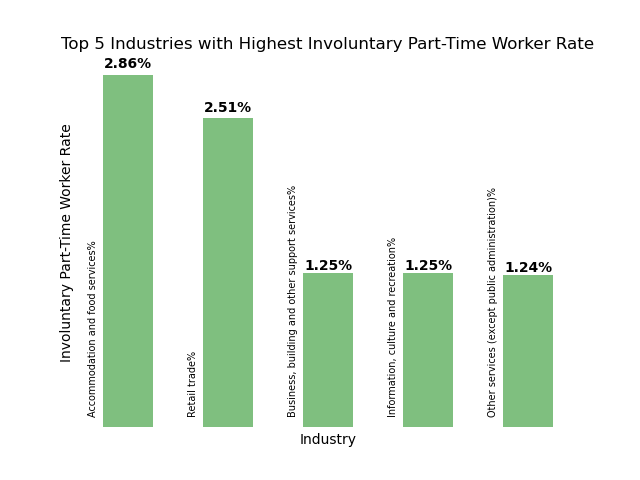

C:\conda_tmp\ipykernel_8120\2597449255.py:60: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


<BarContainer object of 5 artists>

In [432]:
involun_pt_graph(df3)

# Saving graphs and tables

In [442]:
# we will call all the functions written for the and save the output to Datasets folder

#unemployment rate
unen_tbl=unemployment_rate_tbl(df)

#tertiary rate
tert_tbl=tertiary_rate_tbl(df2)

#involuntary part-time workers
involun_tbl=involun_pt_rate_tbl(df3)

In [436]:
unen_tbl.to_csv('Datasets/output_unen_tbl.csv', encoding='utf-8', index=False)
tert_tbl.to_csv('Datasets/output_tert_tbl.csv', encoding='utf-8', index=False)
involun_tbl.to_csv('Datasets/output_involun_tbl.csv', encoding='utf-8', index=False)

<IPython.core.display.Javascript object>


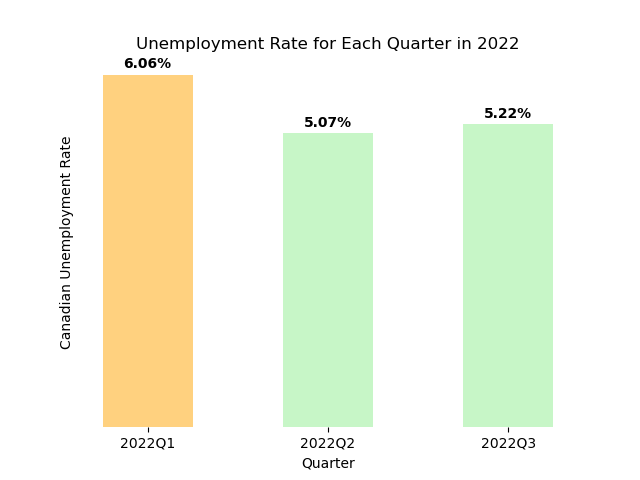

In [441]:
unen_graph=unemployment_graph(df)
plt.show()
plt.savefig('Datasets/output_unemployment.png')

<IPython.core.display.Javascript object>


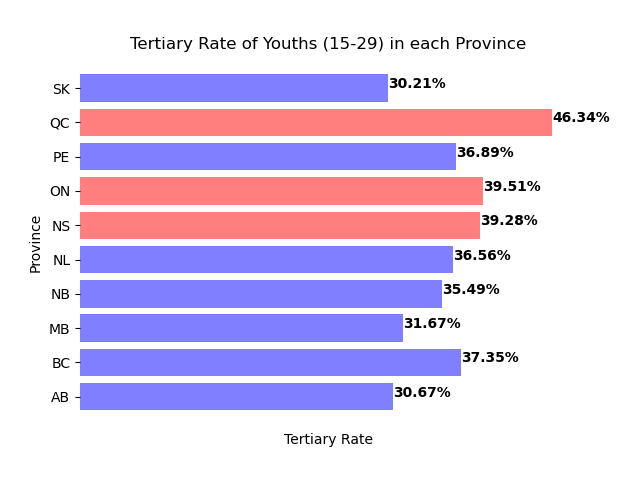

In [443]:
tert_graph=tertiary_graph(df2)
plt.show()
plt.savefig('Datasets/output_tertiary.png')

<IPython.core.display.Javascript object>


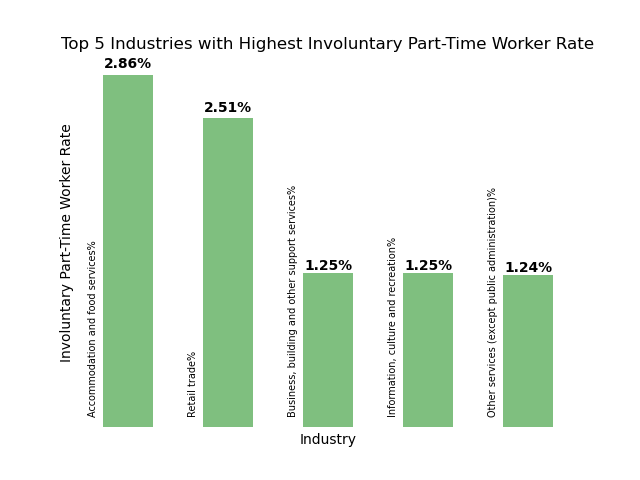

C:\conda_tmp\ipykernel_8120\2597449255.py:60: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


In [444]:
involun_tbl=involun_pt_graph(df3)
plt.show()
plt.savefig('Datasets/output_involuntaryPT.png')